<a href="https://colab.research.google.com/github/VicentePina7210/DataMiningCleaningExercise/blob/main/data_cleaning_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaing Exercise

Identify problems with the NYC Airbnb dataset. Write functions to clean the data as specified by the questions below. Use the example code for identifying potential issues with the dataset

Take a look at this bad data guide to help identify potential issues with this dataset: https://github.com/Quartz/bad-data-guide?tab=readme-ov-file#text-is-garbled

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

min number_of_reviews:  0
avg number_of_reviews:  23.274465691788528
max number_of_reviews:  629
Value counts
neighbourhood
none                          4951
Williamsburg                  3125
Bedford-Stuyvesant            2983
missing                       2453
Harlem                        2090
                              ... 
Bay Terrace, Staten Island       1
Lighthouse Hill                  1
East_Morrisania                  1
Bull's_Head                      1
Queens_Village                   1
Name: count, Length: 321, dtype: int64
Histogram


'Great Manhattan 25min Barclays Center 15 minutes'

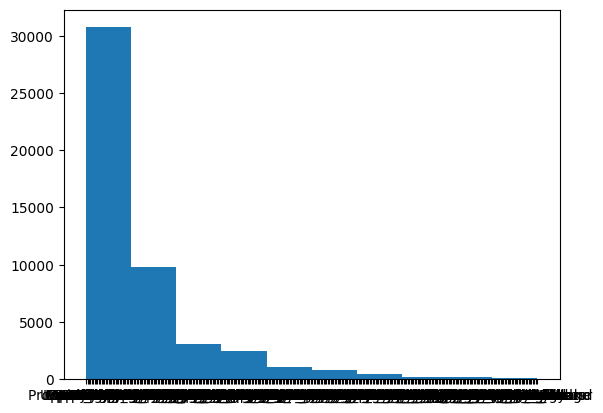

In [ ]:
# EXAMPLE CODE

# Get the minimum, average, and maximum value
print("min number_of_reviews: ", ab_df["number_of_reviews"].min())
print("avg number_of_reviews: ", ab_df["number_of_reviews"].mean())
print("max number_of_reviews: ", ab_df["number_of_reviews"].max())

# Print unique value counts for a certain column
print("Value counts")
print(ab_df["neighbourhood"].value_counts())

# Convert column to a list
neighbourhood_values = ab_df["neighbourhood"].to_list()

# Plot histogram
print("Histogram")
plt.hist(neighbourhood_values, bins=10)
plt.plot()


ab_df.loc[4, "name"]

In [ ]:
# Load the dataset
ab_df = pd.read_csv("/content/sample_data/AB_NYC_2019_unclean.csv")

# Example the first five rows
ab_df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ng_num,availability
0,16936036,Budget Friendly Place WIFi AC Parking Comfy Bed,2788934,Andrew,Brooklyn,Greenpoint,40.72155,-73.94414,Private room,59,2,155,2019/06/30,5.20,2,60,1,NaN
1,2063587,Beautiful Penthouse Apartment,9864136,Anthony,MANHATTAN,Kips Bay,40.74282,-73.98030,Private room,$75,30,42,2018/12/10,0.67,26,345,0,NaN
2,2309363,Huge Loft heart of Upper West Side,11793333,Jamie,MANHATTAN,NaN,40.78263,-73.97415,Entire home/apt,650,2,30,2016-06-02,0.47,1,0,0,NaN
3,21703746,Urban Oasis in Sunnyside Gardens,839657,Mark,QUEENS,Sunnyside,40.74706,-73.91831,Private room,70,2,35,2019/06/10,1.80,1,306,2,NaN
4,28228599,Great Manhattan 25min Barclays Center 15 minutes,94214493,Dadrine,"Brooklyn, NY",East Flatbush,40.65612,-73.91788,Private room,65,7,4,2019-05-10,0.49,9,365,1,NaN
5,26694068,Beautiful cozy 3 bedrooms steps from Industry ...,199147185,Lou,Brooklyn,none,40.66214,-73.99511,Entire home/apt,172,1,34,2019/06/20,-1.00,5,133,1,NaN
6,35465106,Explore NYC in Stylish Contemporary Studio,1031,Lenny,Manhattan,missing,40.76397,-73.99078,Entire home/apt,219,1,5,2019/07/01,5.00,1,173,0,NaN
7,30126658,Cozy stylish luxury... in the heart of Soho!!!,3562922,John,MANHATTAN,Nolita,40.72154,-73.99727,Entire home/apt,$300,4,3,2019/05/28,0.48,1,97,0,NaN
8,23642811,Cozy 1 Bedroom on the Upper West Side,1031,Robert,Manhattan,Upper West Side,40.77480,-73.97922,Private room,120,2,4,2018/04/01,0.24,1,0,0,NaN
9,35916694,New Sophisticated 4BR/2.5BA NYC Midtown Apt,115180259,Leslie,MANHATTAN,Murray Hill,40.74865,-73.98158,Entire home/apt,299,3,1,2019-06-29,1.00,1,187,0,NaN


In [ ]:
# Just looking at the first few rows of this dataset, what issues or potential issues do you see?
# ...naming conventions for name column are all over the place

# ... neighbourhood_group is inconsistent
# ... neighbourhood	column is inconsistent with null values

neighbourhood
none                          4951
Williamsburg                  3125
Bedford-Stuyvesant            2983
missing                       2453
Harlem                        2090
                              ... 
Bay Terrace, Staten Island       1
Lighthouse Hill                  1
East_Morrisania                  1
Bull's_Head                      1
Queens_Village                   1
Name: count, Length: 321, dtype: int64


In [ ]:
# Write a bit of code to identify how many missing values are in each column
# ...
missing_count_per_column = ab_df.isna().sum()

print("Missing values per column:")
print(missing_count_per_column)

# neighbourhood_values = ab_df["neighbourhood"].to_list()
# print (neighbourhood_values)

Missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                      2453
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                  9550
calculated_host_listings_count        0
availability_365                      0
ng_num                                0
availability                      48408
dtype: int64


In [ ]:
# Write a function to clean the price column
# ...


def add_dollar_sign(df, column_name):

    df = df.copy()

    df[column_name] = df[column_name].apply(lambda x: f"${x}" if pd.notna(x) and not str(x).startswith('$') else x)

    return df

ab_df = add_dollar_sign(ab_df, 'price')

print(ab_df['price'].head(10))


0     $59
1     $75
2    $650
3     $70
4     $65
5    $172
6    $219
7    $300
8    $120
9    $299
Name: price, dtype: object


In [ ]:
# Write a function to clean the neighbourhood column
# ...
print(ab_df['neighbourhood'].head(10))

def remove_missing_values(df, column_name):
    df = df.copy()

    df_cleaned = df.dropna(subset=[column_name])

    return df_cleaned

ab_df_cleaned = remove_missing_values(ab_df, 'neighbourhood')

# Print the DataFrame after cleaning
print(ab_df_cleaned['neighbourhood'].head(10))



0         Greenpoint
1           Kips Bay
2                NaN
3          Sunnyside
4      East Flatbush
5               none
6            missing
7             Nolita
8    Upper West Side
9        Murray Hill
Name: neighbourhood, dtype: object
0          Greenpoint
1            Kips Bay
3           Sunnyside
4       East Flatbush
5                none
6             missing
7              Nolita
8     Upper West Side
9         Murray Hill
10    Lower_East_Side
Name: neighbourhood, dtype: object


In [ ]:
# Write a function to clean the last review column
# ...
ab_df = ab_df.drop(columns=['availability'])

             id                                               name    host_id  \
0      16936036    Budget Friendly Place WIFi AC Parking Comfy Bed    2788934   
1       2063587                      Beautiful Penthouse Apartment    9864136   
2       2309363                 Huge Loft heart of Upper West Side   11793333   
3      21703746                   Urban Oasis in Sunnyside Gardens     839657   
4      28228599   Great Manhattan 25min Barclays Center 15 minutes   94214493   
...         ...                                                ...        ...   
48890  33243041  Beautiful Bright Brooklyn BedRoom *20 Min to C...  201407513   
48891   3946177                   A Safe & Pleasant Time in NYC, 2   20438402   
48892   9435931       2Bed/ 2Bath Impeccable Stylish Brooklyn Home    5037211   
48893  34468427          Gorgeous Midtown West LOFT - 4BEDs/2BATHs  257654201   
48894  34809450                  Fantastic Apartment in Greenpoint    2157562   

             host_name neig

In [ ]:
# Identify five more mistakes or odd patterns in the dataset. How would you address each of these identified problems?
# ...instead
# ...ng num column was weird and unclear - redundant
# ...neighbourhood was formatted in many different ways
# ...neighbourhood has some null values but also strings that represent null
# ...the availability column was completely null - redundant
# ...